In [93]:
import numpy as np
from matplotlib import pyplot as plt

# compute cosmology with class

In [94]:
def get_cosmo(h,Omega_b,Omega_cdm,Omega_m,A_s,n_s,sigma8=0):
    
    #Create a params dictionary
    params = {'output':'mPk,mTk',
                 'non linear':'halofit',
                 'Omega_b':Omega_b,
                 'Omega_cdm':Omega_cdm,#Omega_m-Omega_b,#
                 'h':h,
                 'n_s':n_s,
                 'A_s':A_s,#'n_s':n_s,'sigma8':0.828,#
                 'P_k_max_1/Mpc':k_max,
                 'z_max_pk':10. #Default value is 10
    }
    if sigma8 !=0:
        params = {'output':'mPk,mTk',
                 'non linear':'halofit',
                 'Omega_b':0.02242/h**2,
                 'Omega_cdm':Omega_m-Omega_b,#Omega_cdm,#
                 'h':h,
                 'n_s':n_s,
                 'sigma8':0.828,#'A_s':A_s,#'n_s':n_s,
                 'P_k_max_1/Mpc':k_max,
                 'z_max_pk':10. #Default value is 10
                 }
        

    #Initialize the cosmology and compute everything
    cosmo = Class()
    cosmo.set(params)
    cosmo.compute()
    
    return cosmo
#Need to specify the max wavenumber
k_max = 100 #UNITS: 1/Mpc # is also set to 10 later
#Start by specifying the cosmology  - planck best fit
h = 0.6766
Omega_b = 0.02242/h**2
Omega_cdm = 0.11933/h**2
Omega_m = Omega_cdm+Omega_b
A_s = 2.105e-9 
n_s = 0.9665

cosmo = get_cosmo(h,Omega_b,Omega_cdm,Omega_m,A_s,n_s)

#scoccimarro and noorikuhani cosmology
Omega_m = 0.32
sigma8 = 0.828
n_s = 0.968

cosmo = get_cosmo(h,Omega_b,Omega_cdm,Omega_m,A_s,n_s,sigma8=sigma8)

# So we need to also define survey specific parameters like biases

In [95]:
import cosmo_wap as cw
import cosmo_wap.pk as pk

## Import expression for each contributions

In [101]:
survey_params = cw.survey_params.SurveyParams(cosmo)
print(survey_params.Euclid.__dict__.keys())

dict_keys(['b_1', 'z_range', 'be_survey', 'Q_survey', 'n_g', 'f_sky'])


### CosmologicalFunctions takes in the cosmology and a survey_params dict

In [97]:
survey_params.Euclid.b_1 = lambda xx: 5 + 1*xx
#survey_params.Euclid.Q_survey = lambda xx: -2/5 + 0*xx
#survey_params.Euclid.be_survey = lambda xx: 0 + 0*xx

In [98]:
#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=False)

### functions have this format
- xxx.lx(params,cosmo_functions,zz,t=0)


### now all parameters we need are computable from cosmo_functions - lets look at an example plots

In [99]:
zz=1 # redshift
kk = np.linspace(0.001,0.1)

(0.003, 0.1)

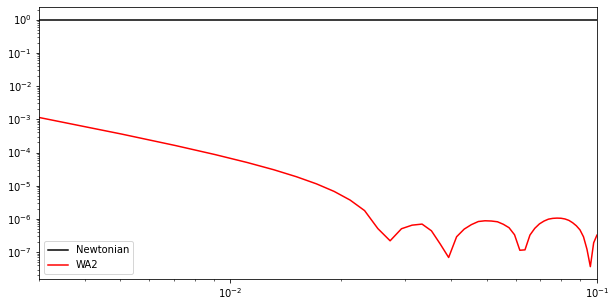

In [100]:
#for monopole 

plt.figure(figsize=(10,5))

#set LOS to t=1/2 - this is the natural choice for your theory for the monopole
t=1/2

norm = np.abs(pk.Pk0.l0(cosmo_funcs,kk,zz=1,t=t).real)
#regular newtonian expression
plt.loglog(kk,np.abs(pk.Pk0.l0(cosmo_funcs,kk,zz=1,t=t).real)/norm,'k',label='Newtonian')

plt.loglog(kk,np.abs(pk.WA2.l0(cosmo_funcs,kk,zz=1,t=t).real)/norm,'r',label='WA2')

plt.legend()
plt.xlim(0.003,0.1)


Text(0, 0.5, '$ P_0(k) $')

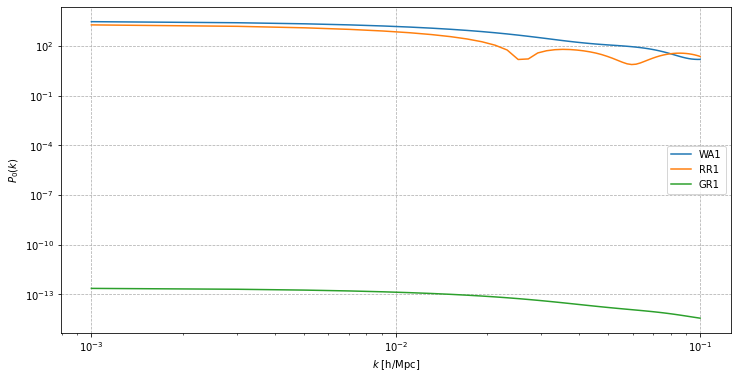

In [76]:
# for dipole
plt.figure(figsize=(12,6))
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=False)

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')

## Or we can consider the multi-tracer case 

In [102]:
#we now assing different survey parameters to survey_params1
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid,survey_params.SKAO2],compute_bias=False)

(1.0, 10000.0)

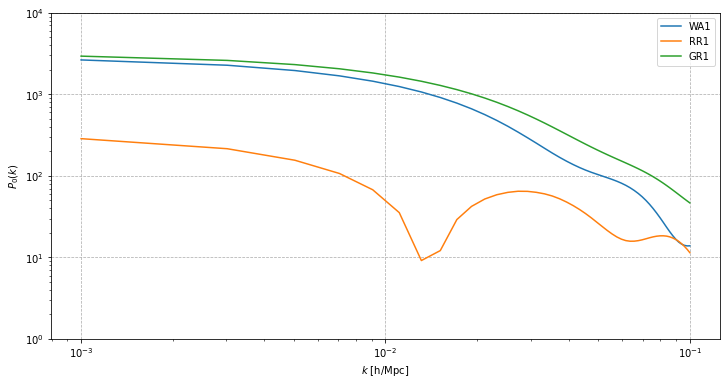

In [103]:
# for dipole - now the GR part does not cancel
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_0(k) $')
plt.ylim(1e+0,1e+4)